In [1]:
import time
import pickle
import numpy as np
from torchvision import transforms
import pandas as pd
import numpy as np
import cv2
import torch
from torch import nn
import matplotlib
import matplotlib.pyplot as plt

from model import Classifier

/root/fashion-effnet/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#Predict
from PIL import Image
import numpy as np
import cv2
def predict(image,encoder,transforms = None,inv_normalize = None):
    model = torch.load('../outputs/model.pth')
    model.eval()
    if(isinstance(image,np.ndarray)):
      image = Image.fromarray(image)
    if(transforms!=None):
        image = transforms(image)
    data = image.expand(1,-1,-1,-1)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data = data.type(torch.FloatTensor).to(device)
    sm = nn.Softmax(dim = 1)
    output = model(data)
    output = sm(output)
    _, preds = torch.max(output, 1)
    img_plot(image,inv_normalize)
    prediction_bar(output,encoder)
    return preds
def prediction_bar(output,encoder):
    output = output.cpu().detach().numpy()
    a = output.argsort()
    a = a[0]
    
    size = len(a)
    if(size>5):
        a = np.flip(a[-5:])
    else:
        a = np.flip(a[-1*size:])
    prediction = list()
    clas = list()
    for i in a:
      prediction.append(float(output[:,i]*100))
      clas.append(str(i))
    for i in a:
        print('Class: {} , confidence: {}'.format(encoder[int(i)],float(output[:,i]*100)))
    plt.bar(clas,prediction)
    plt.title("Confidence score bar graph")
    plt.xlabel("Confidence score")
    plt.ylabel("Class number")
 
def img_plot(image,inv_normalize = None):
    if(inv_normalize!=None):
        image = inv_normalize(image)
    image = image.cpu().numpy().transpose(1,2,0)
    plt.imshow(image)
    plt.show()


In [8]:
with open("../bin/encoder.pickle", 'rb') as fr:
    encoder = pickle.load(fr)
with open("../bin/test_transforms.pickle", 'rb') as fr:
    test_transforms = pickle.load(fr)
with open("../bin/inv_normalize.pickle", 'rb') as fr:
    inv_normalize = pickle.load(fr)

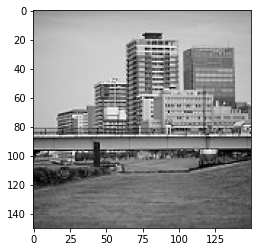

Class: buildings , confidence: 99.3459701538086
Class: street , confidence: 0.5211557745933533
Class: sea , confidence: 0.1184200868010521
Class: glacier , confidence: 0.010278173722326756
Class: mountain , confidence: 0.0036843956913799047


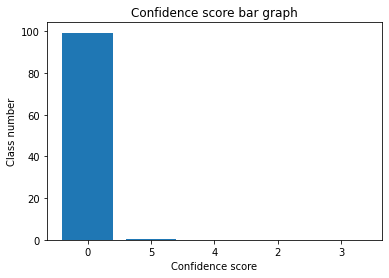

In [9]:
image = cv2.imread('../input/seg_pred/24333.jpg')
pred = predict(image,encoder,test_transforms,inv_normalize)